# Coding Block 3 - Decision Trees

### Load the packages

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
# %pip install plotly
from plotly.offline import init_notebook_mode,iplot
from plotly.tools import FigureFactory as ff
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
'''
...
'''

'\n...\n'

### Read the dataset (the complete data with outliers and missing data). 

In [14]:
df = pd.read_csv("../data/diabetes.csv")

### Build a decision tree model
Think of training-test distinction -- with cross validation.

To build a decision tree model with training-test distinction and cross-validation, you can follow these steps:

Handle Missing Data: Replace or impute missing values in the dataset.
Split the Data: Use train_test_split to divide the dataset into training and testing sets.
Train the Model: Use DecisionTreeClassifier to train the model on the training set.
Evaluate with Cross-Validation: Use cross_val_score to evaluate the model's performance with cross-validation.


In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Handle missing data (replace 0 with NaN for specific columns)
columns_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_missing] = df[columns_with_missing].replace(0, np.nan)

# Impute missing values with the median
df.fillna(df.median(), inplace=True)

# Split the data into features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

# Test the model on the test set
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_pred)}")

Cross-Validation Scores: [0.69827586 0.75652174 0.67826087 0.71304348 0.62608696]
Mean CV Score: 0.6944377811094452

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       125
           1       0.57      0.43      0.49        67

    accuracy                           0.69       192
   macro avg       0.65      0.63      0.63       192
weighted avg       0.67      0.69      0.68       192

Accuracy on Test Set: 0.6875


### Evaluate the prediction model using a classification report
Does the model look like a successful model?

## Visualize the Decision Tree

One way to  do this is using <b>

    <i>from sklearn.tree import plot_tree</i>

Alternative way of plotting the decision tree using

    <i> from sklearn.tree import export_graphviz import pydotplus </i>

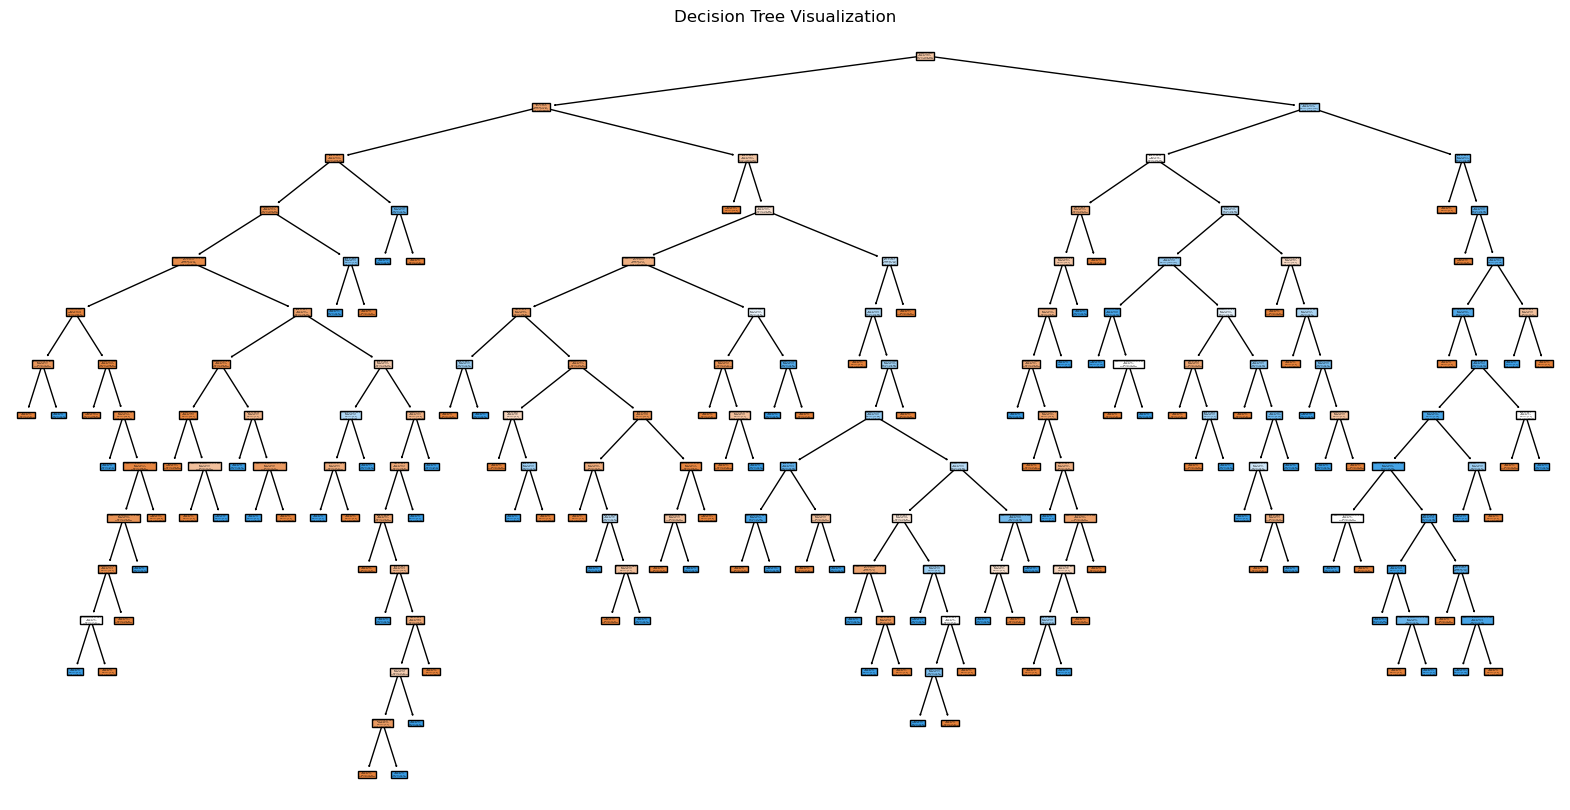

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

### Make Decision Rules

Make the decision rules explicit. You can use (e.g.)
    <i> from sklearn.tree import export_text </i>

In [17]:
from sklearn.tree import export_text

# Export the decision rules as text
tree_rules = export_text(model, feature_names=list(X.columns))
print(tree_rules)

|--- Glucose <= 132.50
|   |--- Age <= 30.50
|   |   |--- BMI <= 45.40
|   |   |   |--- Pregnancies <= 7.50
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.51
|   |   |   |   |   |--- Insulin <= 37.00
|   |   |   |   |   |   |--- BloodPressure <= 81.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- BloodPressure >  81.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Insulin >  37.00
|   |   |   |   |   |   |--- Glucose <= 111.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Glucose >  111.50
|   |   |   |   |   |   |   |--- SkinThickness <= 12.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- SkinThickness >  12.50
|   |   |   |   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.20
|   |   |   |   |   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.19
|   |   |   |   |   |   |   |   |   |   |--- Pregnancies <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated bran